In [171]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score

In [86]:
df = pd.read_csv('insurance.csv')

In [87]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
df['region'].value_counts().to_frame()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [89]:
df.reset_index(inplace=True)
df.set_index('index', inplace=True)

In [90]:
labelencoder = LabelEncoder()

In [91]:
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df = pd.get_dummies(data=df, columns=['region'])

In [92]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
index,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False


In [93]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [94]:
Spearman_correlation_matrix = df.corr(method='spearman')
Spearman_correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020809,0.107736,0.056992,-0.025210,0.534392,-0.000149,0.002683,-0.015273,0.013315
sex,-0.020809,1.000000,0.044802,0.015589,0.076185,0.009490,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.107736,0.044802,1.000000,0.015607,0.002203,0.119396,-0.133115,-0.127168,0.249037,0.001710
children,0.056992,0.015589,0.015607,1.000000,0.016583,0.133339,-0.025690,0.034465,-0.019531,0.011466
smoker,-0.025210,0.076185,0.002203,0.016583,1.000000,0.663460,0.002811,-0.036945,0.068498,-0.036945
charges,0.534392,0.009490,0.119396,0.133339,0.663460,1.000000,0.046109,-0.021634,0.017275,-0.042354
region_northeast,-0.000149,-0.002425,-0.133115,-0.025690,0.002811,0.046109,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,0.002683,-0.011156,-0.127168,0.034465,-0.036945,-0.021634,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.015273,0.017117,0.249037,-0.019531,0.068498,0.017275,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.013315,-0.004184,0.001710,0.011466,-0.036945,-0.042354,-0.320177,-0.320829,-0.346265,1.000000


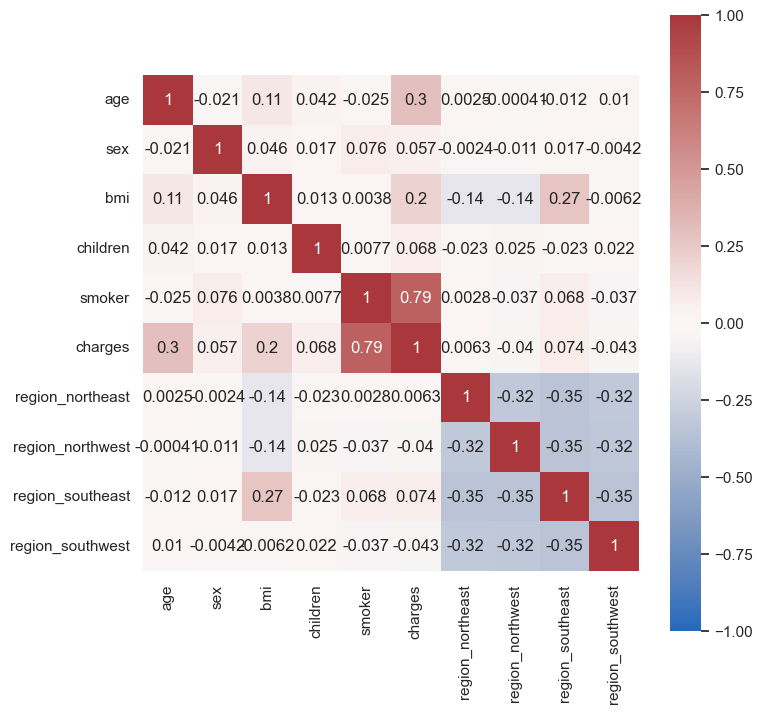

In [95]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

Brak silnej korelacji między zmiennymi, największa korelacja występuje między opłatami a paleniem papierosów, następnie wiekiem i bmi.

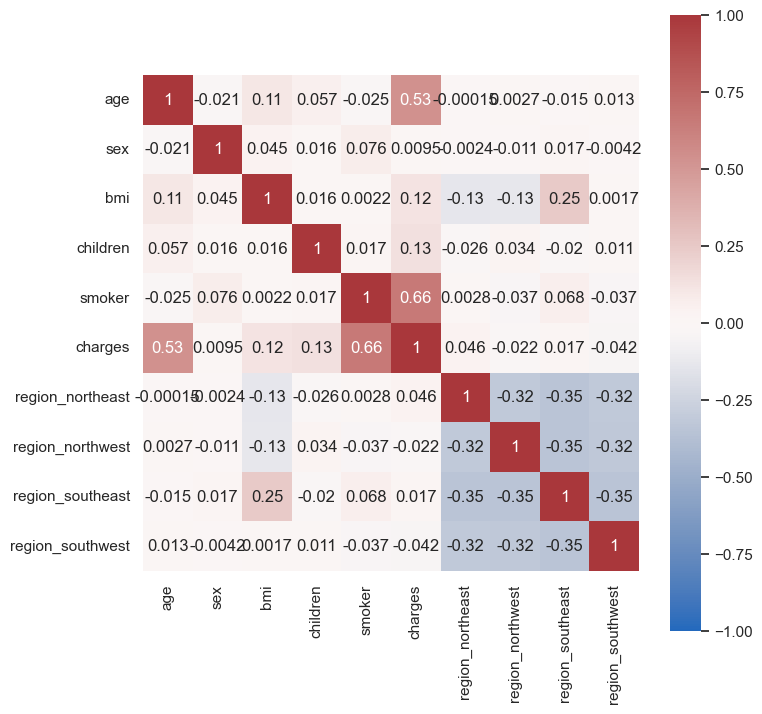

In [96]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    Spearman_correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

In [97]:
df.isnull().values.any()

False

In [98]:
bmi = pd.DataFrame(
    [
    {"BMI": "< 18.5", "Condition": "Underweight"},
    {"BMI": "18.5 - 24.9", "Condition": "Healthy weight"},
    {"BMI": "25.0 - 29.9", "Condition": "Overweight"},
    {"BMI": "35 > X > 30", "Condition": "Obesity, class 1"},
    {"BMI": "40 > X > 35", "Condition": "Obesity, class 2"},
    {"BMI": "< 40", "Condition": "Obesity, class 3"}
    ]
)
bmi

,BMI,Condition
0,< 18.5,Underweight
1,18.5 - 24.9,Healthy weight
2,25.0 - 29.9,Overweight
3,35 > X > 30,"Obesity, class 1"
4,40 > X > 35,"Obesity, class 2"
5,< 40,"Obesity, class 3"


In [99]:
conditions = [
    (df['bmi'] >= 0) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >=35) & (df['bmi'] < 40),
    (df['bmi'] >= 40) & (df['bmi'] < 45),
    (df['bmi'] >= 45)
]

results = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity, class 1', 'Obesity, class 2', 'Obesity, class 3']

df['BMI'] = np.select(conditions, results)

In [100]:
df['BMI'].value_counts().to_frame()

,count
BMI,
Overweight,391
Healthy weight,386
Underweight,245
"Obesity, class 1",225
"Obesity, class 2",71
"Obesity, class 3",20


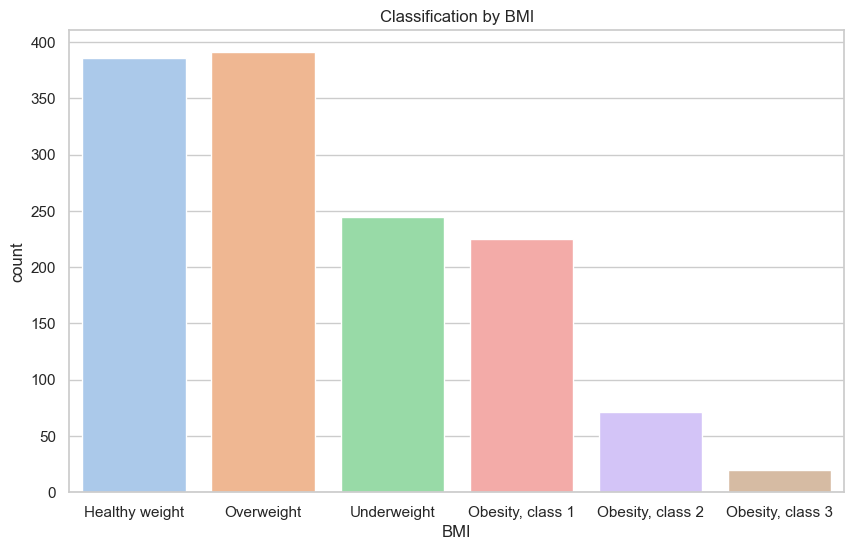

In [101]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(x=df['BMI'])
plt.title('Classification by BMI')

plt.show();

Jest niemal tyle samo osób o zdrowej wadze, co osób z nadwagą. Warto zauważyć, że jest dużo osób otyłych - otyłość jest rozbita na klasy, po zsumowaniu ich, będziemy mieli do czynienia z wartością niemal równą nadwadze/zdrowej wadze. Dane pochodzą ze Stanów Zjednoczonych, gdzie otyłość stanowi duży problem społeczny, jest to dosyć istotna cecha naszych danych.

In [102]:
df['smoker'].value_counts().to_frame()

,count
smoker,
0,1064
1,274


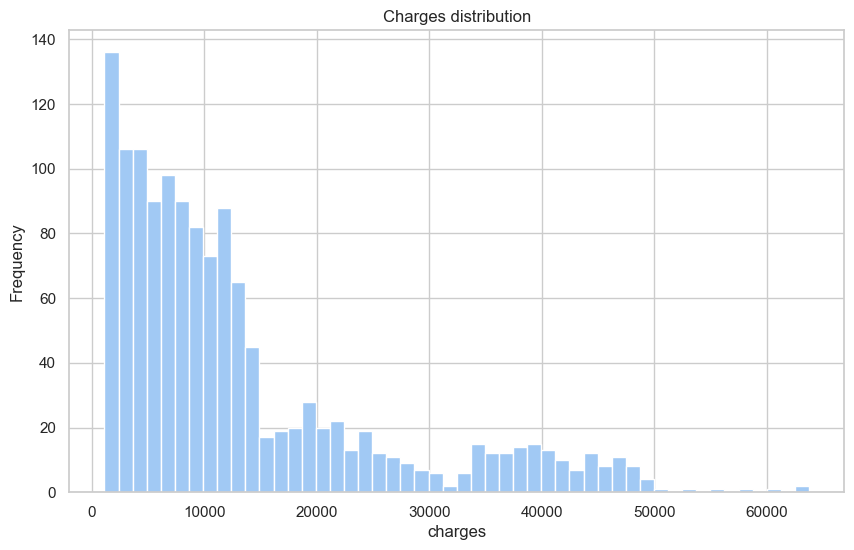

In [103]:
plt.figure(figsize=(10,6))
df['charges'].plot(kind='hist', bins=50)
plt.xlabel('charges')
plt.title('Charges distribution')
plt.show()

Wartości po zlogarytmowaniu

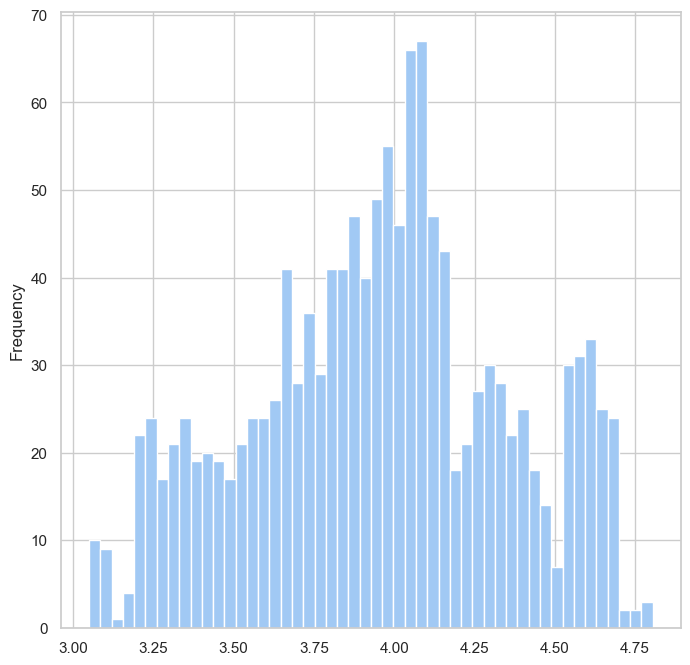

In [104]:
np.log10(df['charges']).plot(kind='hist', bins=50);

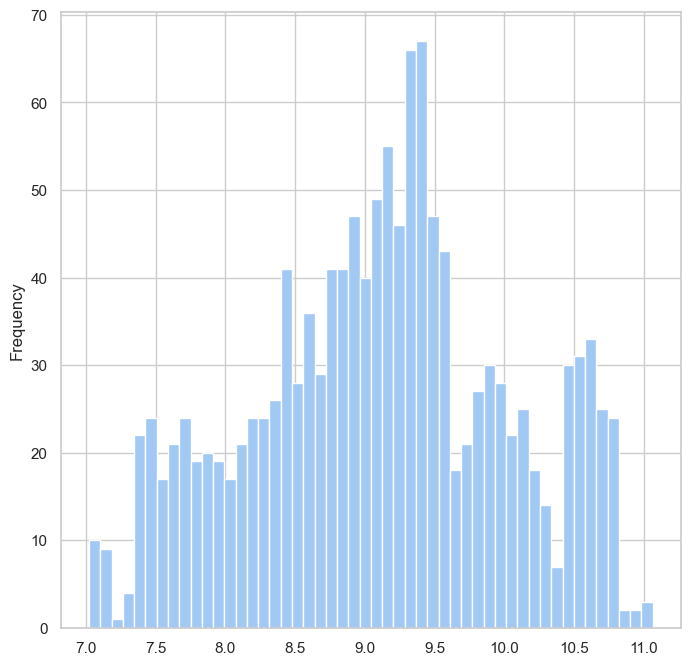

In [105]:
np.log(df['charges']).plot(kind='hist', bins=50);

In [106]:
nosmoke = df[df['smoker']==0]
smoke = df[df['smoker']==1]

In [107]:
nosmoke['charges']

index
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

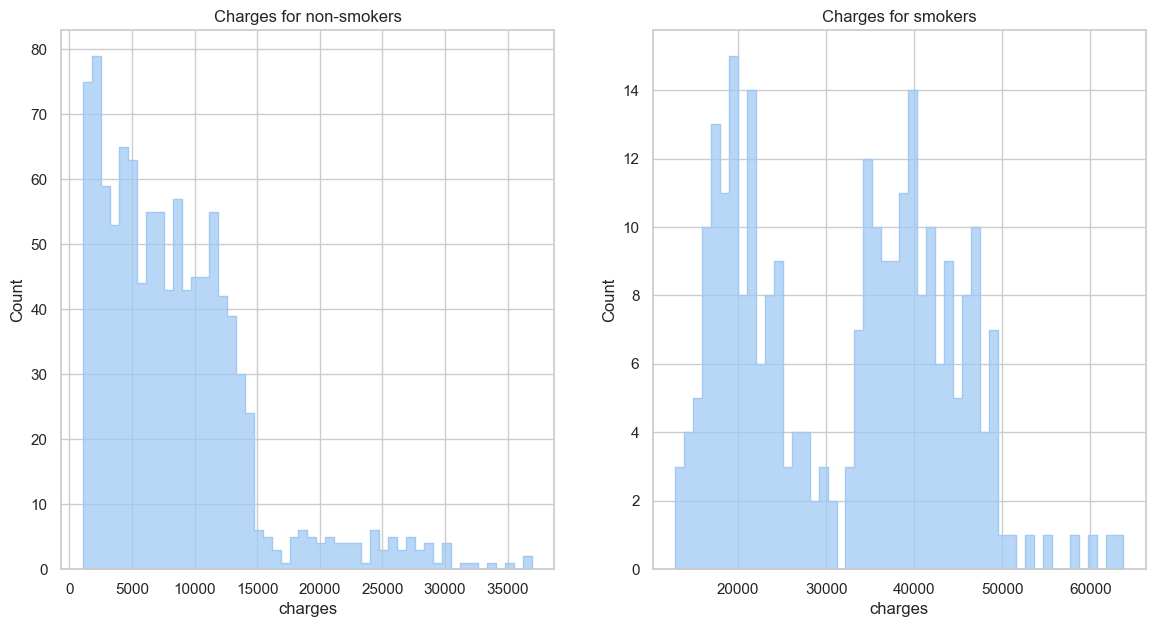

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
sns.histplot(nosmoke['charges'], ax=axes[0], bins=50, element="step")
axes[0].set_title('Charges for non-smokers')
sns.histplot(x='charges', data=smoke, ax=axes[1], bins=50, element="step")
axes[1].set_title('Charges for smokers')
plt.style.use('seaborn-deep')
plt.show()

Zakres opłat dla osób palących papierosy jest dużo wyższy. Ich rozkłas się różni. Dla osób niepalących mamy rozkład prawoskośny, czyli rozkład częsty dla danych finansowych - przewaga wartości niskich. Jednak dla palaczy jest to rozkład bardziej nieregularny, niemalże o dwóch peakach (ale też jest mniej danych).

In [109]:
df['sex'].value_counts().to_frame('Count')

,Count
sex,
1,676
0,662


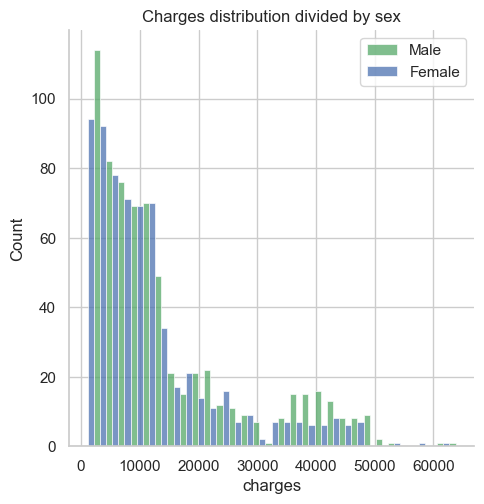

In [110]:
sns.displot(df, x='charges', hue='sex', multiple='dodge', legend=False)
plt.title('Charges distribution divided by sex')
plt.legend(['Male','Female'])

plt.show()

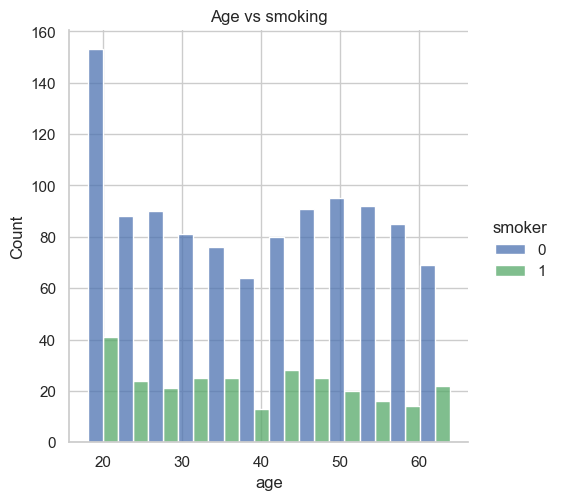

In [111]:
sns.displot(df, x='age', hue='smoker', multiple='dodge')
plt.title('Age vs smoking')

plt.show()

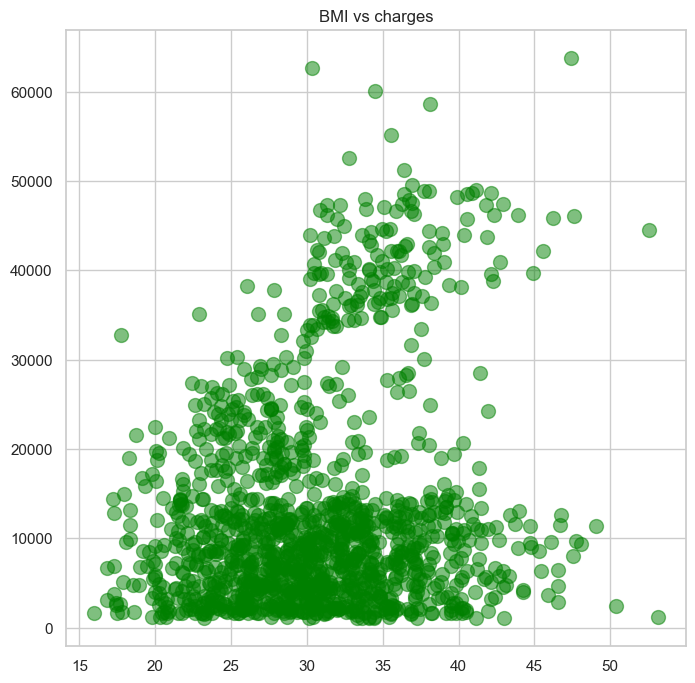

In [112]:
plt.scatter(df['bmi'], df['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

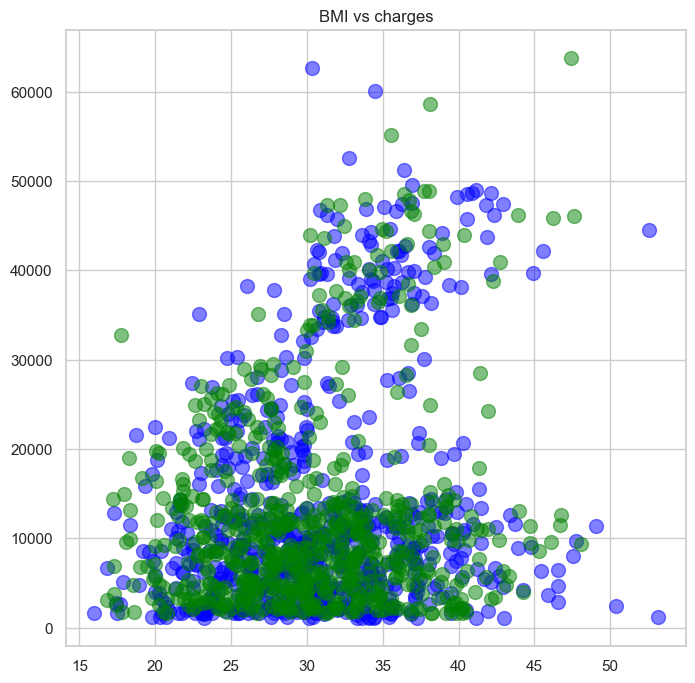

In [113]:
female = df[df['sex']==0]
male = df[df['sex']==1]
plt.scatter(male['bmi'], male['charges'],s=100, color='blue', alpha=0.5)
plt.scatter(female['bmi'], female['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

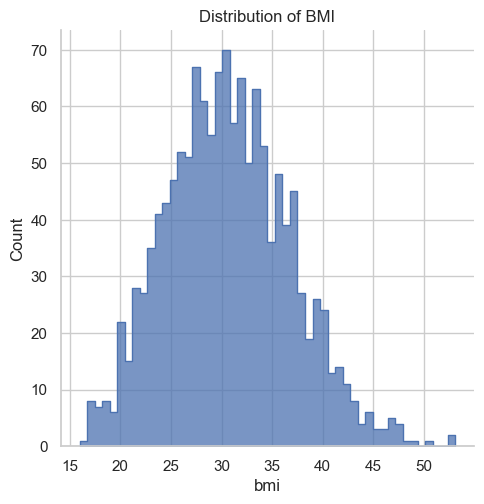

In [114]:
sns.displot(df, x='bmi',element='step', bins=50)
plt.title('Distribution of BMI')
plt.show()

BMI ma rozkład normalny, moda ok. 30 (od 30 jest otyłość)

In [115]:
df['children'].value_counts().to_frame()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


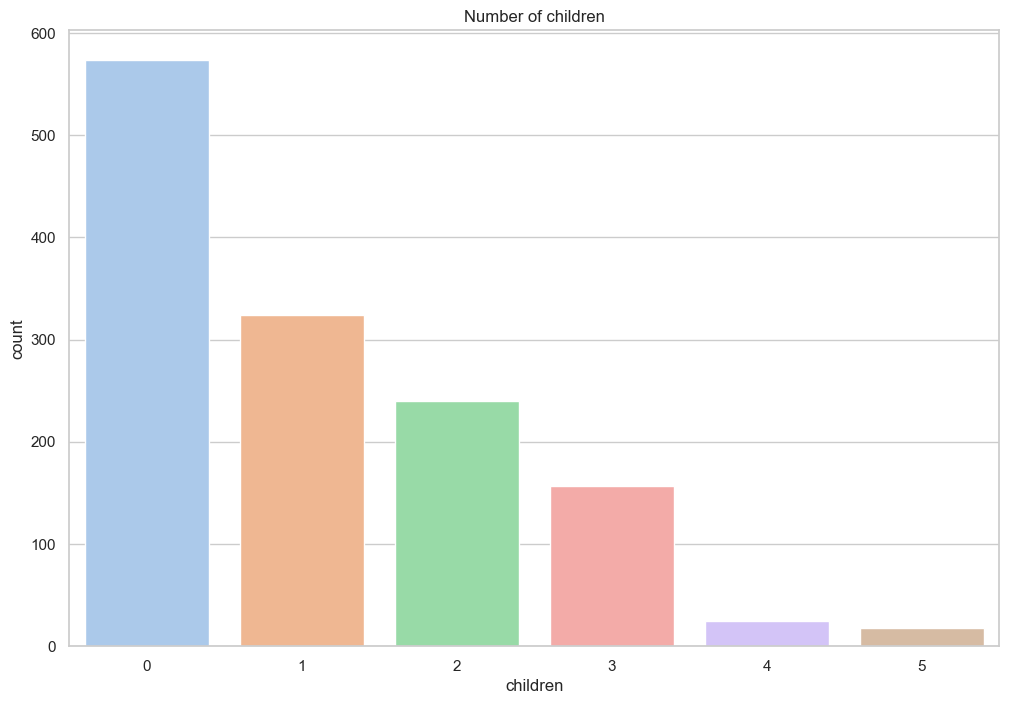

In [116]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(x=df['children'])
plt.title('Number of children')

plt.show();

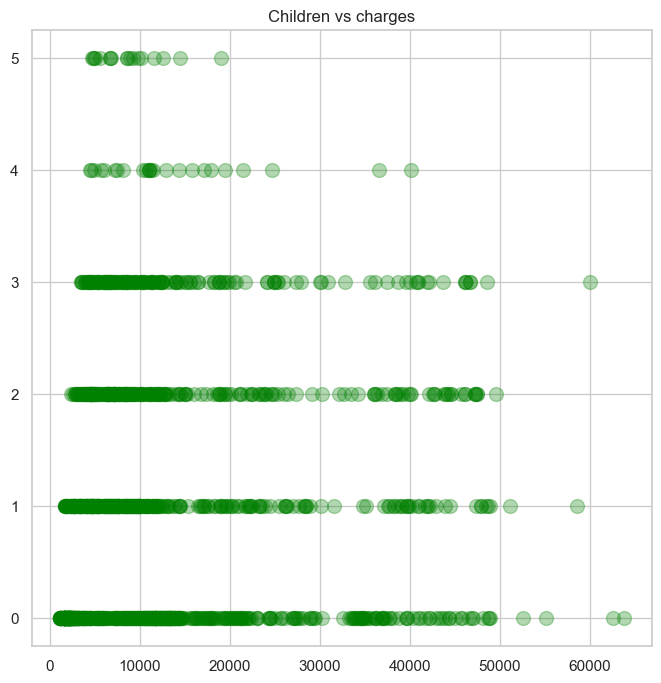

In [117]:
plt.scatter(df['charges'], df['children'],s=100, color='green', alpha=0.3)
plt.title('Children vs charges')
plt.show()

***Modele*** Regresja liniowa, random forest, SVR, poszukać innych - np. regresja wielomianowa

***Miary sukcesu***
RMSE, r^2, MAE, MAPE, wizualizacja na scatter plocie

<h2>Modelowanie<h2/>

<h3>xgboost<h3/>

In [118]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI
index,,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,False,False,False,True,Healthy weight
1,18,1,33.770,1,0,1725.55230,False,False,True,False,Overweight
2,28,1,33.000,3,0,4449.46200,False,False,True,False,Overweight
3,33,1,22.705,0,0,21984.47061,False,True,False,False,Underweight
4,32,1,28.880,0,0,3866.85520,False,True,False,False,Healthy weight


In [119]:
y = df['charges']
colx = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
x = df[colx]

In [121]:
!pip3 install xgboost

  Using cached xgboost-1.7.5-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.8 MB)


In [122]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [124]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=20, 
    max_depth=6,
    subsample=0.5,
    colsample_bytree=1,
)

In [125]:
params= {
'n_estimators': range(1,50,5),
'max_depth': range(1,8,2),
'subsample': [0, 0.1, 0.25,0.5, 0.75, 1],
'colsample_bytree': [0, 0.1, 0.25,0.5, 0.75, 1],
'eta': [0, 0.1, 0.25,0.5, 0.75, 1],
}

In [126]:
from sklearn.model_selection import GridSearchCV

Strojenie parametrów - trwało to 30min, bo przesadziłam z ilością parametrów, ale coś tam wyszło.  
 Wyhaszowałam, żeby nie spowalniało całości, niżej model jest fitowany na parametrach z best_params

In [ ]:
#xg_search = GridSearchCV(xg_reg, params, cv=5)
#xg_search.fit(x_train, y_train)

In [ ]:
#xg_search.best_params_

In [ ]:
#xg_search.best_score_

In [127]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=46, 
    max_depth=3,
    subsample=0.75,
    colsample_bytree=1,
    eta=0.1
)

In [128]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=46, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [129]:
y_pred = xg_reg.predict(x_test)


In [130]:
xg_reg.score(x_test, y_test) 

0.9013025555780656

In [131]:
xg_reg.score(x_train, y_train)

0.873795081665234

Model jest dobrze zbalansowany, score jest podobny zarówno na teście jak i trainie

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics
from matplotlib.pylab import rcParams

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("RMSE - gbtree: ", rmse)
print("MAE - gbtree: ", mae)

RMSE - gbtree:  3963.0443616180364
MAE - gbtree:  2371.057726134328


Nasz model myli się średnio o ok. 2500 dolarów. Nie jest to wartość zatrważająco duża, ponieważ są to ROCZNE opłaty, wartości są dosyć duże.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

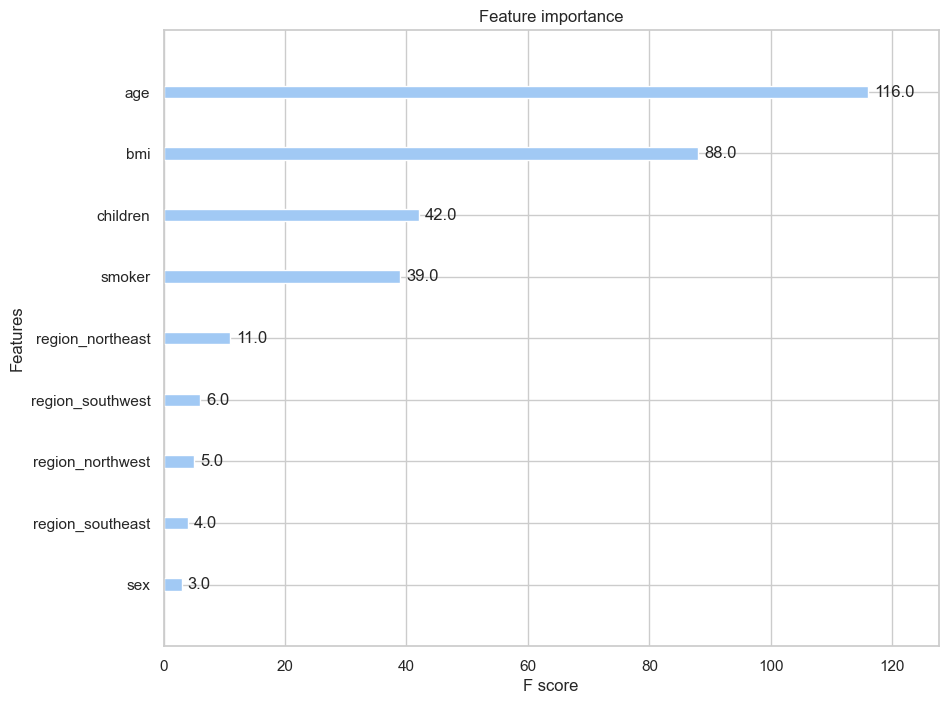

In [134]:
rcParams['figure.figsize'] = 10, 8

xgb.plot_importance(xg_reg)

Co ciekawe najważniejszą zmienną dla modelu okazał się wiek, który faktycznie korelował z opłatami w jakimś stopniu, ale nie tak silnie jak palenie papierosów, które ma miejsce trzecie.

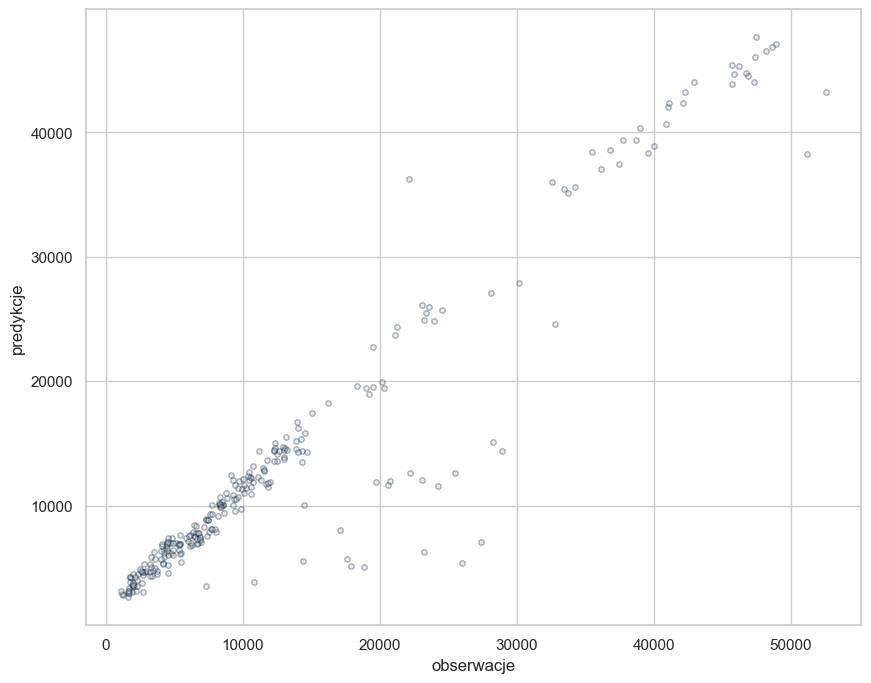

In [135]:
plt.scatter(
    y_test,
    y_pred,
    edgecolor="black",
    s=15, 
    alpha = 0.3)
plt.xlabel("obserwacje")
plt.ylabel("predykcje");

W idealnym przypadku obserwacje z predykcjami byłyby w jednej linii, ale widzimy, że te odchylenia nie są bardzo duże.

In [ ]:
from sklearn.metrics import r2_score

In [136]:
r2_score(y_test, y_pred)

0.9013025555780656

In [140]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

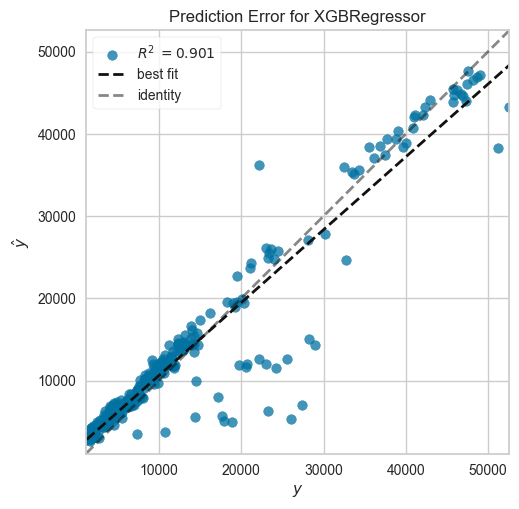

In [141]:
prediction_error(xg_reg, x_train, y_train, x_test, y_test);

R^2 wynosi 83%, czyli nasz model uwzględnia taki procent wariancji dla zbioru.    
Czarna linia oznaczałaby najlepszy model, który najlepiej przewiduje kwoty. Nasz model jest dosyć blisko tej linii.

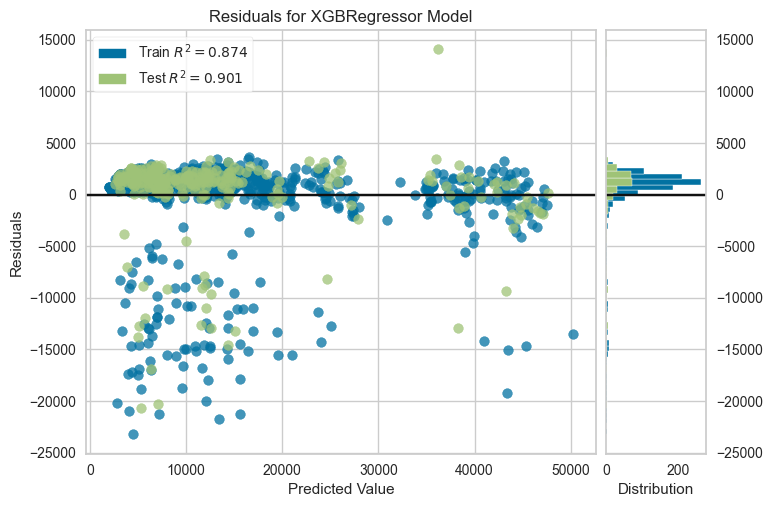

In [142]:
residuals_plot(xg_reg, x_train, y_train, x_test, y_test);

Wnioski z wykresu? rozkład normalny reszt. Reszty są skupione głównie wokół 0, czyli model zazwyczaj mało się myli.  
Pozostała część reszt jest rozproszona, te mocniej odstające są częściej ujemne. 

Chciałam sprawdzić czy standaryzacja i PCA pomogą tutaj usprawnić model

Wniosek: PCA nie pomogło zwiększyć efektywności modelu.

XGBOOST
R^2 0.8452188534851794
RMSE - gbtree:  4986.577318902035
MAE - gbtree:  2579.3158939387536

In [170]:
def znajdz_najlepszy_model_gridsearchcv(X,y): 
    algos = {

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
               
                'splitter': ['best','random'],
                'max_depth': range(1,10),
                'min_samples_leaf':range(1,4)
            }
            
        },
        'randomforest_regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[150]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

znajdz_najlepszy_model_gridsearchcv(x,y)

,model,best_score,best_params
0,decision_tree,0.880719,"{'max_depth': 5, 'min_samples_leaf': 3, 'split..."
1,randomforest_regressor,0.869172,{'n_estimators': 150}


In [157]:
rf=RandomForestRegressor(n_estimators=150)
rf.fit(x_train, y_train)
rf_scores = cross_val_score(rf, x_train, y_train, scoring='r2', cv = 5)
print("Accuracy score dla Random forest: ", rf_scores)
print("Average accuracy score dla Randam forest: ", rf_scores.mean())

Accuracy score dla Random forest:  [0.8495849  0.8259809  0.7983521  0.82308667 0.77367882]
Average accuracy score dla Randam forest:  0.8141366768989066


In [158]:
y_pred = rf.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2) Score:', r2)

Root Mean Squared Error (RMSE): 4351.814068227313
Mean Absolute Error (MAE): 2571.2745701315284
R-squared (R2) Score: 0.8809885617512777


,Miary,Random forest,XGBoost
0,RMSE,4674.84,4986.58
1,MAE,2507.64,2579.31
2,R^2,0.87,0.85


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [146]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.7999876970680433

In [147]:
y_pred = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2) Score:', r2)

Root Mean Squared Error (RMSE): 5641.62655885019
Mean Absolute Error (MAE): 3933.272649405234
R-squared (R2) Score: 0.7999876970680433


In [167]:
dt = DecisionTreeRegressor(splitter='best', max_depth=5, min_samples_leaf=3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2) Score:', r2)

Root Mean Squared Error (RMSE): 4101.894863733905
Mean Absolute Error (MAE): 2496.393621850626
R-squared (R2) Score: 0.8942654090556071


In [172]:
miary_tab = pd.DataFrame({'Miary':['RMSE','MAE', 'R^2'],
                         'Random forest': [4674.84, 2507.64, 0.87],
                         'XGBoost': [3963.04, 2371.06, 0.90],
                         'Linear Regression': [5641.63, 3933.27, 0.799],
                         'Decision Tree': [4101.89, 2496.39, 0.89]})
miary_tab

,Miary,Random forest,XGBoost,Linear Regression,Decision Tree
0,RMSE,4674.84,3963.04,5641.630,4101.89
1,MAE,2507.64,2371.06,3933.270,2496.39
2,R^2,0.87,0.90,0.799,0.89
